# CMPINF-0010 Final Project (The Foodies)

## Introduction - The Metric

Our group has chosen the metric of which neighborhood produces the "best" food in Pittsburgh. Along with taste and products, the cleanlieness of an area can strongly effect the food being produced. I will examine what restraunts have and haven't passed inspection within the Pittsburgh area.

## My Submetric: Restaurant/Food Facility Inspections and Locations

![inspection](https://media.giphy.com/media/xULW8xwbxgeSN9X2ww/giphy.gif))

## Goal of my Analysis:

My sub-metric is Restaurant/Food Facility Inspections and Locations. Inspections are an important role in order to keep restraunts open and running. I want to find which area passes the most inspections and what are does not. Throughout this project I will find which neoghborhood has the most cleanliness in the food setting.

## Date Preview:

In [7]:
import pandas as pd

data = pd.read_csv('alco-restuarant-violations.csv')
data.head()

,encounter,id,placard_st,facility_name,bus_st_date,description,description_new,num,street,city,...,zip,inspect_dt,start_time,end_time,municipal,rating,low,medium,high,url
0,201401020031,201005070003,1,Vocelli Pizza,2010-04-28,Chain Restaurant without Liquor,Toxic Items,1019,Mt Royal Boulevard,Pittsburgh,...,15223.0,2014-01-02,12:00:00,12:30:00,Shaler,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
1,201401020031,201005070003,1,Vocelli Pizza,2010-04-28,Chain Restaurant without Liquor,Certified Food Protection Manager,1019,Mt Royal Boulevard,Pittsburgh,...,15223.0,2014-01-02,12:00:00,12:30:00,Shaler,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
2,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Probe-Type Thermometers,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
3,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Employee Personal Hygiene,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...
4,201401020032,200307030002,1,The Groove Cheesesteak Co aka Southside Steaks,2003-06-20,Restaurant without Liquor,Handwashing Facilities,2000,E Carson Street,Pittsburgh,...,15203.0,2014-01-02,11:30:00,12:45:00,Pittsburgh-117,V,F,F,F,http://appsrv.alleghenycounty.us/reports/rwser...


## The Best Neighborhood (My Sub-Metric)

First, lets begin by simplifying the data down to only the columns we care about. We only want our data sets to include facility name, city, rating, low, medium, and high.

In [4]:
import pandas as pd

data = pd.read_csv('alco-restuarant-violations.csv')

newdata = data[['facility_name','city', 'rating', 'high', 'medium', 'low', "zip"]]
newdata.head(10)

,facility_name,city,rating,high,medium,low,zip
0,Vocelli Pizza,Pittsburgh,V,F,F,F,15223.0
1,Vocelli Pizza,Pittsburgh,V,F,F,F,15223.0
2,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
3,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
4,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
5,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
6,The Groove Cheesesteak Co aka Southside Steaks,Pittsburgh,V,F,F,F,15203.0
7,Station Street Food,Pittsburgh,V,F,F,F,15206.0
8,Co Go's #346,Homestead,V,F,F,F,15120.0
9,Co Go's #346,Homestead,V,NaN,NaN,NaN,15120.0


Next, lets organize our data accordingly. In order to distinguish which neighborhood each restraunt falls into to we must create a zip code boundary for each neighborhood.

In [3]:
import geopandas as gdp

zip_boundaries = gdp.read_file("zip_codes/Allegheny_County_Zip_Code_Boundaries.shp")
zip_boundaries.head()

,OBJECTID,ZIP,NAME,ZIPTYPE,STATE,STATEFIPS,COUNTYFIPS,COUNTYNAME,S3DZIP,LAT,...,MFDU,SFDU,BOXCNT,BIZCNT,RELVER,COLOR,GlobalID,SHAPESTAre,SHAPESTLen,geometry
0,4,15007,BAKERSTOWN,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.656688,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308124,"POLYGON ((-79.92421 40.65181, -79.92422 40.651..."
1,5,15014,BRACKENRIDGE,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.607964,...,59.0,1396.0,38.0,76.0,1.9.3,5.0,{D7938129-8427-49A4-8C6C-3A19848432D4},1.515338e+07,16855.546429,"POLYGON ((-79.73317 40.60314, -79.73351 40.603..."
2,6,15015,BRADFORD WOODS,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.636452,...,0.0,430.0,95.0,56.0,1.9.3,10.0,{BABB5D5E-1FF4-4E03-BBAB-B84CBB5BFB31},2.613718e+07,33453.262195,"POLYGON ((-80.07258 40.64492, -80.07241 40.644..."
3,8,15018,BUENA VISTA,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.289408,...,0.0,286.0,129.0,22.0,1.9.3,11.0,{4E2C2FAA-7976-4BEF-8119-BBB65C2F7014},6.096210e+07,76802.232756,"POLYGON ((-79.78014 40.29274, -79.77960 40.292..."
4,14,15034,DRAVOSBURG,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,NaN,...,0.0,950.0,29.0,104.0,1.9.3,6.0,{C7A863B3-22E1-42B1-A368-872E83B4A9CC},2.935004e+07,26075.246862,"POLYGON ((-79.88627 40.35929, -79.88607 40.359..."


Next, we will split all the restraunts into 2 seperate groups, regarding their rating. Group V does not pass inspection and has a violation, meanwhile Group N passes inspection with no violations.

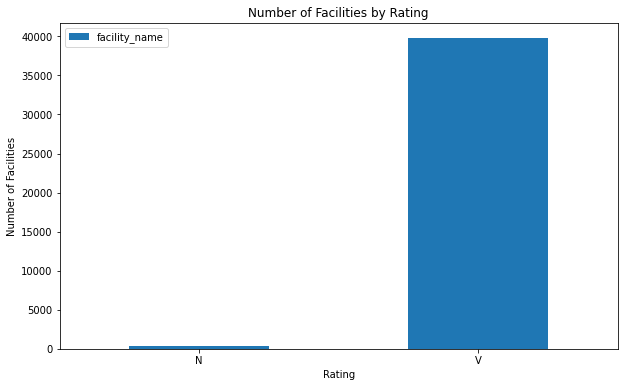

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('alco-restuarant-violations.csv')
newdata = data[['facility_name', 'rating']]

# Group the data by rating and count the number of facilities in each rating category
rating_counts = newdata.groupby('rating').count()

# Create a bar chart
ax = rating_counts.plot(kind='bar', figsize=(10, 6), rot=0)

# Set the chart title and axis labels
ax.set_title('Number of Facilities by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Facilities')

# Show the chart
plt.show()

Now we want to count the number of restraunts in each neighborhood that have a violation. In order to do this we must import the geoemtric data using geopandas to find the neighborhood locations.

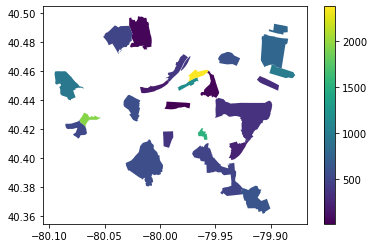

In [48]:
import pandas as pd
import geopandas as gdp
import requests
from io import StringIO
import matplotlib.pyplot as plt
import contextily as ctx

neighborhoods_url = 'https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff'

response_neighborhoods = requests.get(neighborhoods_url)
csv_data_neighborhoods = StringIO(response_neighborhoods.text)

df_neighborhoods = pd.read_csv(csv_data_neighborhoods)

url_neighborhood_boundaries = 'https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/pittsburghpaneighborhoods-.geojson'
gdf_neighborhood_boundaries = gdp.read_file(url_neighborhood_boundaries)
gdf_neighborhood_boundaries["Violations"] = 0
gdf_neighborhood_boundaries["zip_code"] = None


zip_boundaries = gdp.read_file("zip_codes/Allegheny_County_Zip_Code_Boundaries.shp")

for idx, zip_bound in zip_boundaries.iterrows():
    for idx2, nHood in gdf_neighborhood_boundaries.iterrows():
        if nHood["geometry"].intersects(zip_bound["geometry"]):
            gdf_neighborhood_boundaries.loc[idx2, "zip_code"] = zip_boundaries.loc[idx, "ZIP"]
            break
            


violations_by_zip = newdata[newdata["rating"] == "V"].value_counts("zip")
for idx, nHood in gdf_neighborhood_boundaries.iterrows():
    if nHood["zip_code"] == None:
        continue
    if int(nHood["zip_code"]) in violations_by_zip.index:
        gdf_neighborhood_boundaries.loc[idx, "Violations"] += violations_by_zip[int(nHood["zip_code"])]
        

gdf_neighborhood_boundaries[gdf_neighborhood_boundaries["Violations"] > 0].plot(column="Violations", legend=True)
    

Now that we have this data, lets put it in form of a bar graph in order to see what neighborhood has the most and least violations.

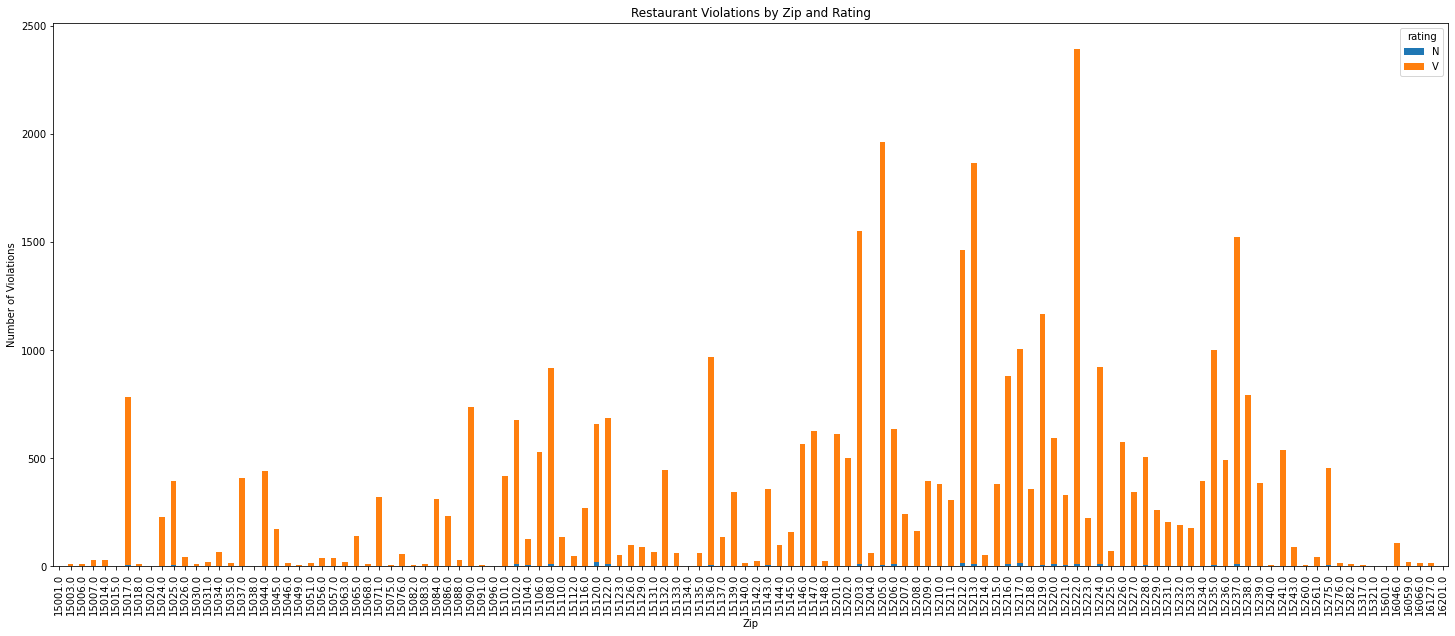

In [10]:
import matplotlib.pyplot as plt

# group the data by zip and rating and count the occurrences
grouped = newdata.groupby(['zip', 'rating']).size().reset_index(name='counts')

# pivot the data to create a matrix of counts for each zip and rating
pivot = grouped.pivot(index='zip', columns='rating', values='counts')

# create a stacked bar chart with the counts for each rating stacked on top of each other
pivot.plot(kind='bar', stacked=True, figsize=(25,10))  # <- set the figsize parameter here

# set the title and axis labels
plt.title('Restaurant Violations by Zip and Rating')
plt.xlabel('Zip')
plt.ylabel('Number of Violations')

# show the chart
plt.show()


Finally, lets simplify down our data to only look at the restraunt with no signs of violations.

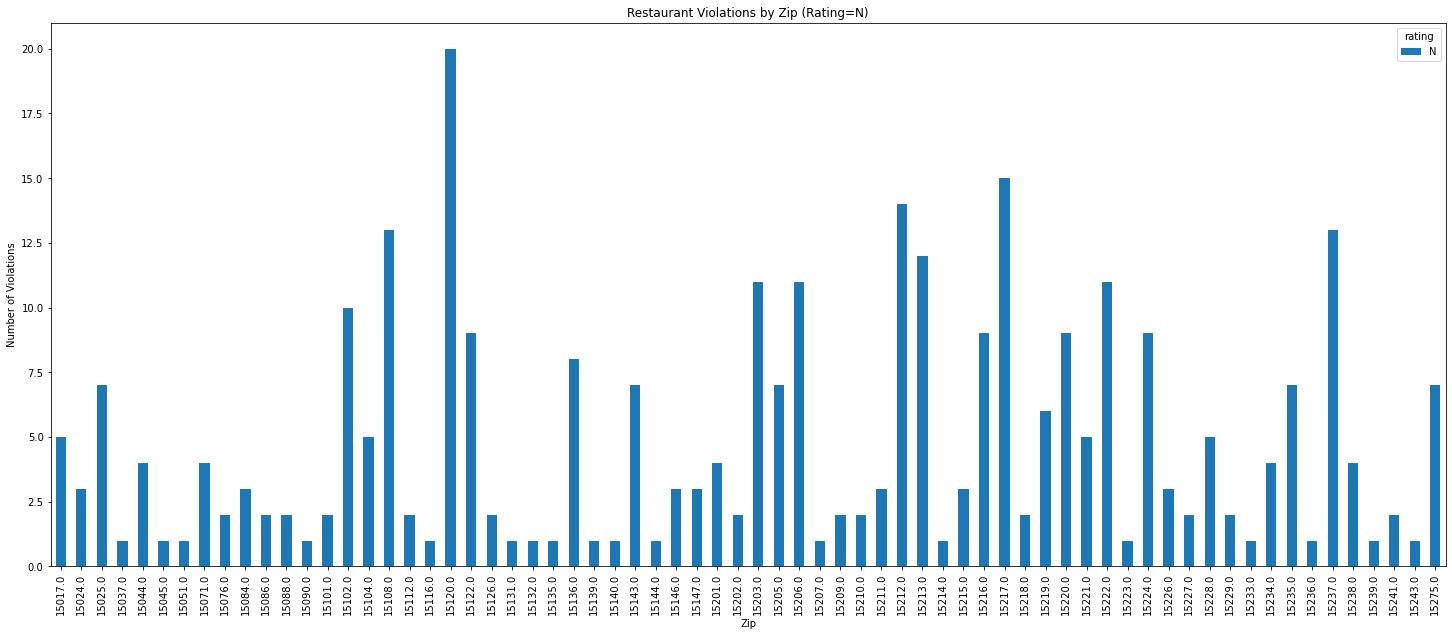

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('alco-restuarant-violations.csv')

newdata = data[['facility_name','city', 'rating', 'high', 'medium', 'low', "zip"]]

# group the data by zip and rating and count the occurrences
grouped = newdata.groupby(['zip', 'rating']).size().reset_index(name='counts')

# filter the grouped data to only include rows with 'N' ratings and sort in descending order by counts
n_grouped = grouped[grouped['rating'] == 'N'].sort_values('counts', ascending=False)

# pivot the data to create a matrix of counts for each zip and rating
pivot = n_grouped.pivot(index='zip', columns='rating', values='counts')

# create a bar chart with the counts for each zip
pivot.plot(kind='bar', figsize=(25, 10))

# set the title and axis labels
plt.title('Restaurant Violations by Zip (Rating=N)')
plt.xlabel('Zip')
plt.ylabel('Number of Violations')

# show the chart
plt.show()



In [13]:
import pandas as pd

# read the data from the CSV file
data = pd.read_csv('alco-restuarant-violations.csv')

# filter the data to only include rows with 'N' ratings
n_data = data[data['rating'] == 'N']

# group the data by zip and count the occurrences
grouped = n_data.groupby('zip').size().reset_index(name='counts')

# sort the data in descending order by counts
sorted_data = grouped.sort_values('counts', ascending=False)

# take the top 10 results
top_10 = sorted_data.head(10)

# print the top 10 results as a table
print(top_10.to_string(index=False))


    zip  counts
15120.0      20
15217.0      15
15212.0      14
15237.0      13
15108.0      13
15213.0      12
15206.0      11
15203.0      11
15222.0      11
15102.0      10


## Conclusion/Results

Based on the graph and table above, we can conclude that the zip code 15210 (St. Clair) has the highest number of restaurants with no violations, followed by zip code 15217 (Squirrel Hill) in second place, and zip code 15212 (Brighton Heights) in third place. It is important to note that this data is relative to the number of restaurants in each neighborhood, so it is possible that some neighborhoods have more restaurants than others. Nonetheless, the data presented here shows that St. Clair has the cleanest restaurants with the least amount of violations among the neighborhoods analyzed.